# Question 1

Load the data and convert to a pandas DataFrame

In [1]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib.pyplot as plt

client = Socrata("data.cityofchicago.org", None)
results = client.get("6zsd-86xi", where="year=2017 OR year=2018",limit=1000000)
results_df = pd.DataFrame.from_records(results)

In [2]:
results_df.head(1)

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,41.843778126,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694637678,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017


In [3]:
results_df.shape

(534374, 22)

Question 1 - generate summary statistics

In [4]:
year_type = results_df.groupby(["primary_type","year"]).size()
year_type = year_type.unstack()
year_type['pct_change'] = ((year_type['2018'] - year_type['2017'])/year_type['2017'])
year_type = year_type.round(2)
year_type.sort_values(by='2018',ascending=False)

year,2017,2018,pct_change
primary_type,,,
THEFT,64346,65082,0.01
BATTERY,49214,49781,0.01
CRIMINAL DAMAGE,29042,27806,-0.04
ASSAULT,19303,20377,0.06
DECEPTIVE PRACTICE,19028,18736,-0.02
OTHER OFFENSE,17227,17130,-0.01
NARCOTICS,11658,12988,0.11
BURGLARY,13000,11730,-0.10
MOTOR VEHICLE THEFT,11406,9988,-0.12


In [5]:
max_increase = (year_type['pct_change'].idxmax(), year_type['pct_change'].max())
max_decrease = (year_type['pct_change'].idxmin(), year_type['pct_change'].min())

print('Maximum increase', max_increase)
print('Maximum decrease', max_decrease)

Maximum increase ('CONCEALED CARRY LICENSE VIOLATION', 1.16)
Maximum decrease ('OTHER NARCOTIC VIOLATION', -0.91)


As we can see, the most common crime is theft, which has increased from 2017 to 2018, followed by battery which also saw an increase. The other most common crimes include criminal damage (e.g. to property), assault, and deceptive practice. 

Looking at the change from 2017 to 2018, the biggest increase was seen in concealed carry license violations, and the biggest decrease was seen in other narcotics violations.

These insights can also be seen in the below bar graph.

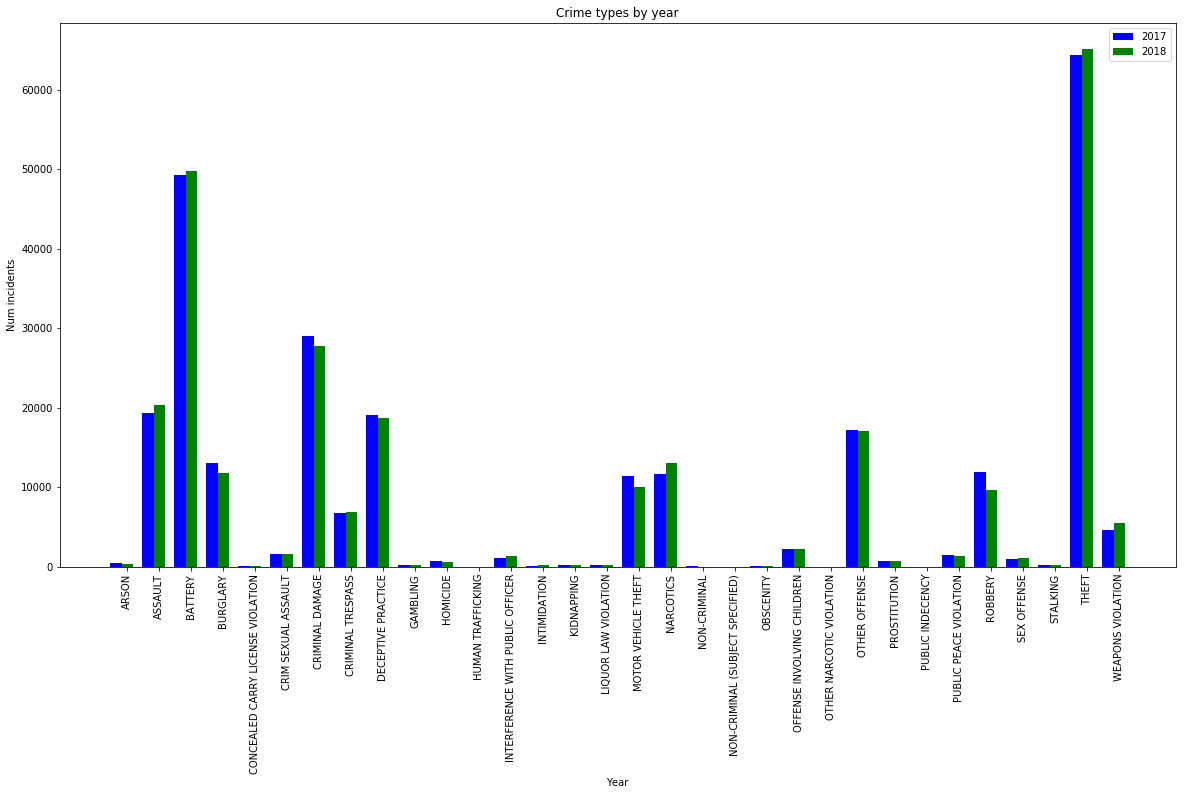

In [6]:
n = year_type.shape[0]
num_2017 = year_type['2017']
num_2018 = year_type['2018']
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(n)
bar_width = 0.35
rects1 = plt.bar(index, num_2017, bar_width,
color='b',
label='2017')

rects2 = plt.bar(index + bar_width, num_2018, bar_width,
color='g',
label='2018')

plt.xlabel('Year')
plt.ylabel('Num incidents')
plt.title('Crime types by year')
plt.xticks(index + bar_width, list(year_type.index),rotation=90)
plt.legend()
plt.show()

Now, we can take a look at summaries across different geographies to get a sense of how that breaks down.

In [7]:
#Overall crime by ward
ward_year = results_df.groupby(["ward","year"]).size()
ward_year = ward_year.unstack()
ward_year_sorted = ward_year.sort_values(by='2018',ascending=False)
ward_year_sorted

year,2017,2018
ward,,
42,17417,18113
24,12578,12537
28,11262,11809
27,10032,11156
2,11488,10108
17,8720,8844
6,8590,8790
21,8041,8184
20,7727,7506


We can see that overall, the ward with the highest number of reported crimes is the 42nd ward, which includes downtown areas such as parts of Streeterville, the Gold Coast, West Town. This is followed by the 24th ward, which includes parts of North Lawndale, Garfield Park -- Southwest areas of Chicago more typically associated with crime in the news.

In [8]:
#Select for violent crimes, defined as assault, battery, criminal sexual assault, homicide
violence_df = results_df.loc[results_df["primary_type"].isin(['ASSAULT','BATTERY','CRIM SEXUAL ASSAULT','HOMICIDE'])]
ward_year_v = violence_df.groupby(["ward","primary_type"]).size()
ward_year_v = ward_year_v.unstack()
ward_year_v.fillna(0.0,inplace=True)
ward_year_v['total_violent'] = ward_year_v['ASSAULT'] + ward_year_v['BATTERY'] + ward_year_v['CRIM SEXUAL ASSAULT'] + ward_year_v['HOMICIDE']
ward_year_v_sorted = ward_year_v.sort_values(by='total_violent',ascending=False)
ward_year_v_sorted

primary_type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,HOMICIDE,total_violent
ward,,,,,
28,1832.0,5267.0,144.0,107.0,7350.0
24,1780.0,5209.0,141.0,96.0,7226.0
17,1684.0,4196.0,84.0,46.0,6010.0
6,1514.0,3779.0,97.0,56.0,5446.0
20,1420.0,3777.0,119.0,52.0,5368.0
42,1298.0,3409.0,231.0,7.0,4945.0
7,1315.0,3404.0,94.0,52.0,4865.0
2,1474.0,3180.0,132.0,24.0,4810.0
27,1322.0,3299.0,101.0,43.0,4765.0


As we can see above, when we look at violent crimes, the top wards which appear include the 28th (which includes Garfield Park, North Lawndale), the 24th as described as above, and the 17th (which includes Auburn Gresham, Englewood). Thus, while when looking at overall crimes reported parts of the North Side appear high on the list, when we look at violent crime, South Side neighborhoods are found higher on the list.

We can check also for when crimes are most often occurring

In [10]:
#Add a month column
results_df['new_date'] = pd.to_datetime(results_df['date'])
results_df['month'] = results_df['new_date'].dt.month

#Group crime by month
date_df = results_df.groupby(["month","year"]).size()
date_df = date_df.unstack()
date_df

year,2017,2018
month,,
1,22010,20333
2,19256,17256
3,20509,21148
4,21635,21045
5,23331,24603
6,23794,24078
7,24797,25088
8,24659,25208
9,22769,22793


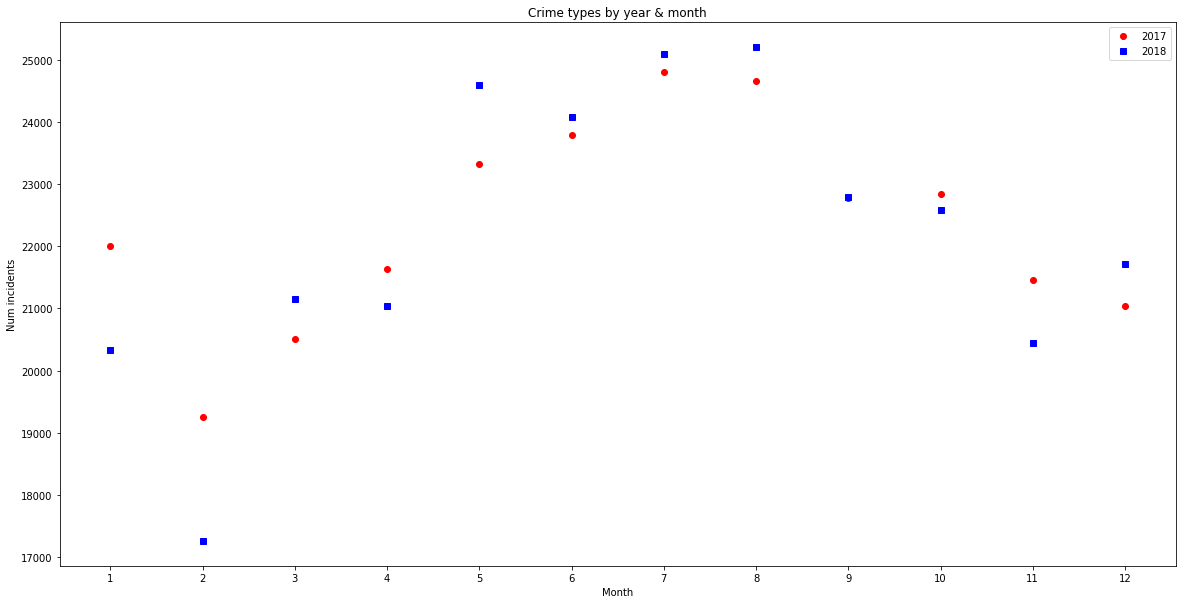

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(date_df.index, date_df['2017'], 'ro')
plt.plot(date_df.index, date_df['2018'], 'bs')

plt.xlabel('Month')
plt.ylabel('Num incidents')
plt.title('Crime types by year & month')
plt.xticks(list(date_df.index))
plt.legend()
plt.show()

Looking at the graph by month, we can see that while there is some variation between whether there was more crime in 2018 or 2017, generally there are highest rates of crime in Chicago over the summer. 